# Working with GeoJSON
The advantage of GeoJSON over shapefiles is:
- The file is human readable, so you can open it in a text editor and understand the contents
- The file stands alone and doesn't rely on other files
- GeoJSON supports multi-part geometries

# Colormaps
When you want to differentiate regions, but not imply any type of relationship between the regions, a qualitative colormap is the best choice. In this exercise you'll compare a qualitative colormap to a sequential (quantitative) colormap using the school districts GeoDataFrame. It is available in your workspace as school_districts.

In [1]:
import geopandas as gpd 

school_districts = gpd.read_file('../datasets/school_districts.geojson')

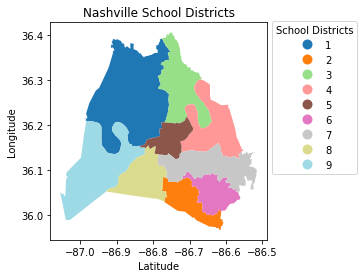

In [2]:
import matplotlib.pyplot as plt
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using the tab20 colormap (qualitative)
school_districts.plot(column='district', cmap = 'tab20', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts')
plt.show()

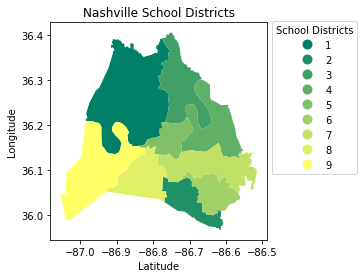

In [3]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using the summer colormap (sequential)
school_districts.plot(column = 'district', cmap = 'summer', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts')
plt.show();

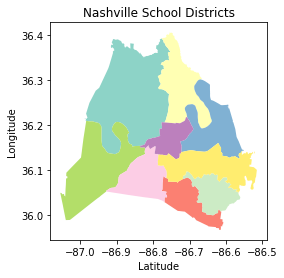

In [4]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using Set3 colormap without the column argument
school_districts.plot(cmap = 'Set3', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts')
plt.show();

# Map Nashville neighborhoods
This time you'll read a GeoJSON file in to a GeoDataFrame to take a quick peek at where Nashville neighborhoods are.

In [5]:
neighborhoods_path = '../datasets/neighborhoods.geojson'

                   name                                           geometry
0  Historic Buena Vista  MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ...
1        Charlotte Park  MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ...
2              Hillwood  MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ...
3            West Meade  MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ...
4          White Bridge  MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ...


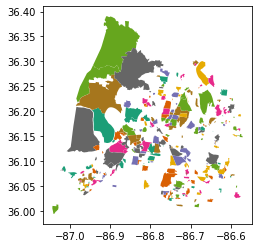

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read in the neighborhoods geojson file
neighborhoods = gpd.read_file(neighborhoods_path)

# Print the first few rows of neighborhoods
print(neighborhoods.head())

# Plot the neighborhoods, color according to name and use the Dark2 colormap
neighborhoods.plot(column = 'name', cmap = 'Dark2')

# Show the plot.
plt.show()

# Changing coordinate reference systems
In this exercise you will learn how to find a GeoDataFrame's coordinate reference system and how to change it. The school districts GeoDataFrame is available in your workspace as school_districts. 

In [7]:
school_districts_path = '../datasets/school_districts.geojson'
school_districts = gpd.read_file(school_districts_path)

In [8]:
# Print the first row of school districts GeoDataFrame and the crs
print(school_districts.head(1))
print(school_districts.crs)

# Convert the crs to epsg:3857
school_districts.geometry = school_districts.geometry.to_crs(epsg = 3857)
                        
# Print the first row of school districts GeoDataFrame and the crs again
print(school_districts.head(1))
print(school_districts.crs)

   first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   

  last_name          address position term_expir district         phone  \
0    Gentry  6108 Beals Lane   Member       2016        1  615-268-5269   

                                            geometry  
0  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...  
epsg:4326
   first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   

  last_name          address position term_expir district         phone  \
0    Gentry  6108 Beals Lane   Member       2016        1  615-268-5269   

                                            geometry  
0  MULTIPOLYGON (((-9659344.056 4353528.767, -965...  
epsg:3857


# Construct a GeoDataFrame from a DataFrame
In this exercise, you will construct a geopandas GeoDataFrame from the Nashville Public Art DataFrame. You will need to import the Point constructor from the shapely.geometry module to create a geometry column in art before you can create a GeoDataFrame from art. This will get you ready to spatially join the art data and the neighborhoods data in order to discover which neighborhood has the most art.

The Nashville Public Art data has been loaded for you as art.

In [9]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

art = pd.read_csv('../datasets/public_art.csv')

# Print the first few rows of the art DataFrame
print(art.head())

# Create a geometry column from lng & lat
art['geometry'] = art.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)

# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs = neighborhoods.crs, geometry = art.geometry)
print(type(art_geo))


                             Title                                 Last Name  \
0          [Cross Country Runners]                                     Frost   
1  [Fourth and Commerce Sculpture]                                    Walker   
2              12th & Porter Mural                                   Kennedy   
3                A Splash of Color  Stevenson and Stanley and ROFF (Harroff)   
4             A Story of Nashville                                    Ridley   

                  First Name                           Location  \
0                      Miley     4001 Harding Rd., Nashville TN   
1                        Lin  333 Commerce Street, Nashville TN   
2                        Kim                  114 12th Avenue N   
3  Doug and Ronnica and Lynn                   616 17th Ave. N.   
4                       Greg    615 Church Street, Nashville TN   

                                              Medium       Type  \
0                                             Bro

# Spatial join practice
Is there a difference between art (point data) that intersects with neighborhoods (polygon data) and art (point data) within neighborhoods (polygon data)? Explore different spatial joins with the art_geo and neighborhoods GeoDataFrames, which are available in your workspace.

In [10]:
# Spatially join art_geo and neighborhoods 
art_intersect_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'intersects')

# Print the shape property of art_intersect_neighborhoods
print(art_intersect_neighborhoods.shape)

(40, 13)


In [11]:
# Create art_within_neighborhoods by spatially joining art_geo and neighborhoods
art_within_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'within')

# Print the shape property of art_within_neighborhoods
print(art_within_neighborhoods.shape)

(40, 13)


In [12]:
# Spatially join art_geo and neighborhoods and using the contains op
art_containing_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'contains')

# Print the shape property of art_containing_neighborhoods
print(art_containing_neighborhoods.shape)

(0, 13)


# Finding the neighborhood with the most public art
Now that you have created art_geo, a GeoDataFrame, from the art DataFrame, you can join it spatially to the neighborhoods data to see what art is in each neighborh

In [13]:
# import packages
import geopandas as gpd
import pandas as pd

# Spatially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, op = "within")

# Print the first few rows
print(neighborhood_art.head())

                                Title Last Name First Name  \
1     [Fourth and Commerce Sculpture]    Walker        Lin   
4                A Story of Nashville    Ridley       Greg   
21                        Chet Atkins     Faxon    Russell   
22  Children's Chairs For The Seasons    McGraw     Deloss   
34                    Foliated Scroll   Bloomer       Kent   

                                             Location  \
1                   333 Commerce Street, Nashville TN   
4                     615 Church Street, Nashville TN   
21  Corner of Fifth Avenue North and Union Street,...   
22                    615 Church Street, Nashville TN   
34                    615 Church Street, Nashville TN   

                                         Medium       Type  \
1                                           NaN  Sculpture   
4                      Hammered copper repousse     Frieze   
21  Bronze stool and guitar on a granite plynth  Sculpture   
22                 Mixed Media - woo

# Aggregating points within polygons
Now that you have spatially joined art and neighborhoods, you can group, aggregate, and sort the data to find which neighborhood has the most public art. You can count artwork titles to see how many artworks are in each neighborhood.

In [14]:
# Get name and title from neighborhood_art and group by name
neighborhood_art_grouped = neighborhood_art[['name', 'Title']].groupby('name')

# Aggregate the grouped data and count the artworks within each polygon
print(neighborhood_art_grouped.agg('count').sort_values(by = 'Title', ascending = False))

                          Title
name                           
Urban Residents              22
Lockeland Springs             3
Edgehill (ONE)                2
Germantown                    2
Hillsboro-West End            2
Inglewood                     2
Sunnyside                     2
Chestnut Hill (TAG)           1
Historic Edgefield            1
McFerrin Park                 1
Renraw                        1
Wedgewood Houston (SNAP)      1


# Plotting the Urban Residents neighborhood and art
Now you know that most art is in the Urban Residents neighborhood. In this exercise, you'll create a plot of art in that neighborhood. First you will subset just the urban_art from neighborhood_art and you'll subset the urban_polygon from neighborhoods. Then you will create a plot of the polygon as ax before adding a plot of the art.

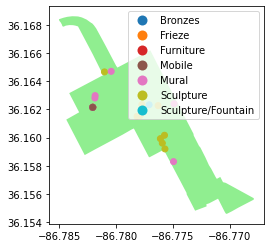

In [15]:
# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == "Urban Residents"]

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

# Plot the urban_polygon as ax 
ax = urban_polygon.plot(color = 'lightgreen')

# Add a plot of the urban_art and show it
urban_art.plot( ax = ax, column = 'Type', legend = True);
plt.show()